<font color="green"> **Before you get started, make sure you are using GPU as your hardware accelerator. Go to Runtime, then Change Runtime Type, and select T4 GPU under Hardware Accelerator.**

# Sentiment Analysis of Social Media Posts about ChatGPT

ChatGPT is a new Generative AI tool made by OpenAI that helps computers understand and use human language better. Since its release, many people have been talking about it on social media. In this problem, you are asked to develop deep learning models to conduct sentiment analysis for each social media post about ChatGPT. By doing this, we can understand how people feel about this new technology.

The dataset consists of 219,200 social media posts about ChatGPT. Each post is labeled as either good, bad, or neutral. I have already cleaned the dataset for you, so that you can focus on the deep learning part.

Run the code below to download the dataset.

In [8]:
import pandas as pd
# Reading the data
df = pd.read_csv('https://www.dropbox.com/scl/fi/gn9mvfuwgidu8a6fw9wqr/ChatGPT.csv?rlkey=ab7b29xpi8ii0fv4zfenghhwk&dl=1')

Let's look at the first 5 rows of the dataset.

In [9]:
df.head()

,text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


As you see, out of the first five posts, two of them are labeled as good, two of them are labeled as neutral, and one of them is labeled as bad.
Let's see how many rows (samples) and columns we have.

In [10]:
df.shape

(219200, 2)

We have 219,200 rows (samples) in the dataset and two columns (the text along with the sentiment).

Run the code below to obtain the samples and the labels, then integer-encode the labels.

In [11]:
# Obtain the array of samples and labels
samples = df['text'].values.astype(str)
labels = df['labels'].values.astype(str)

# Our labels are currently strings (good, bad, neutral) as you saw above.
# We can integer-encode them as follows:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

Before we get into questions, let's check the first 5 samples that are stored in the array called `samples` along with their true labels that are stored in the array called `labels`.

In [12]:
samples[0:5]

array(['ChatGPT Optimizing Language Models for Dialogue ',
       'Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it ',
       'ChatGPT Optimizing Language Models for Dialogue ',
       'THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone ',
       'As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  '],
      dtype='<U285')

In [13]:
labels[0:5]

array([2, 1, 2, 1, 0])

As you see, the neutral, good, and bad labels are assigned values 2, 1, and 0, respectively. Now, let's get into the questions.

## Question 1 (15 pts)

Conduct the necessary data preprocessing for the deep learning task at hand, such as tokenization of samples (consider only the top 10,000 words), padding of samples to length 50, and dummy coding the labels.



In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing

# tokenize the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(samples)

# pad the samples to length 50
sequences = tokenizer.texts_to_sequences(samples)
sequences = preprocessing.sequence.pad_sequences(sequences, maxlen=50)
sequences

array([[   0,    0,    0, ...,  240,   10,  749],
       [   0,    0,    0, ...,  130,  533,    8],
       [   0,    0,    0, ...,  240,   10,  749],
       ...,
       [   0,    0,    0, ...,    8,   20,  115],
       [   0,    0,    0, ...,   78,   11,  216],
       [   0,    0,    0, ...,    1, 2234,  298]], dtype=int32)

In [25]:
# check the shape of data after tokenization and padding
sequences.shape

(219200, 50)

In [26]:
from tensorflow.keras.utils import to_categorical

# dummy code the labels
dummy_labels = to_categorical(labels)
dummy_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [27]:
# check the shape of labels after dummy coding
dummy_labels.shape

(219200, 3)

## Question 2 (10 pts)

Shuffle and set aside 100,000 samples for training, 50,000 samples for validation, and the rest of samples for testing.

In [28]:
from sklearn.utils import shuffle

# shuffle data
sequences, dummy_labels = shuffle(sequences, dummy_labels)

# train/validation/test split of 100,000/50,000/remainder
x_train = sequences[:100000]
x_val = sequences[100000:150000]
x_test = sequences[150000:]

y_train = dummy_labels[:100000]
y_val = dummy_labels[100000:150000]
y_test = dummy_labels[150000:]

x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((100000, 50), (50000, 50), (69200, 50), (100000, 3), (50000, 3), (69200, 3))

## Question 3 (20 pts)

Develop a simple (vanilla) RNN model with 10 units (call this `model1`). Set the embedding dimension to 70. Mask the zero paddings. Use RMSProp optimizer and follow the accuracy metric during training. Train the model for 15 epochs and use batches of 1024 samples. [10 pts]

When training is complete, plot the training and validation loss and accuracy. Interpret your plots. Does the model seem to be overfitting? Explain why / why not. [10 pts]

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

# build the model
model1 = models.Sequential()
model1.add(layers.Embedding(10000, 70, input_length=50, mask_zero=True))
model1.add(layers.SimpleRNN(10))

# 3 class single-label classification problem
# use softmax for output layer activation
# use categorical cross-entropy loss function
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 70)            700000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10)                810       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 700843 (2.67 MB)
Trainable params: 700843 (2.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# train the model
model1_history = model1.fit(x_train,
                            y_train,
                            epochs=15,
                            batch_size=1024,
                            validation_data=(x_val, y_val))

Epoch 1/15
98/98 [==============================] - 23s 179ms/step - loss: 0.9654 - accuracy: 0.5422 - val_loss: 0.8438 - val_accuracy: 0.6325
Epoch 2/15
98/98 [==============================] - 13s 131ms/step - loss: 0.7456 - accuracy: 0.6790 - val_loss: 0.7013 - val_accuracy: 0.6991
Epoch 3/15
98/98 [==============================] - 13s 136ms/step - loss: 0.6376 - accuracy: 0.7329 - val_loss: 0.6213 - val_accuracy: 0.7422
Epoch 4/15
98/98 [==============================] - 10s 107ms/step - loss: 0.5735 - accuracy: 0.7722 - val_loss: 0.5842 - val_accuracy: 0.7699
Epoch 5/15
98/98 [==============================] - 18s 189ms/step - loss: 0.5292 - accuracy: 0.8005 - val_loss: 0.5517 - val_accuracy: 0.7903
Epoch 6/15
98/98 [==============================] - 11s 110ms/step - loss: 0.4949 - accuracy: 0.8186 - val_loss: 0.5331 - val_accuracy: 0.8031
Epoch 7/15
98/98 [==============================] - 10s 108ms/step - loss: 0.4646 - accuracy: 0.8351 - val_loss: 0.5241 - val_accuracy: 0.8073

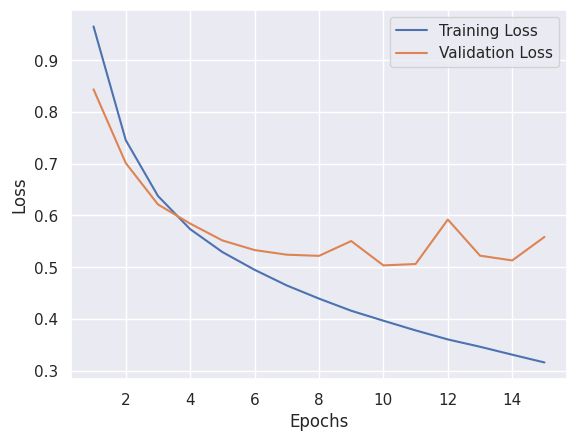

In [34]:
# plot training and validation loss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc1  = model1_history.history['accuracy']
train_loss1 = model1_history.history['loss']
val_acc1  = model1_history.history['val_accuracy']
val_loss1 = model1_history.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

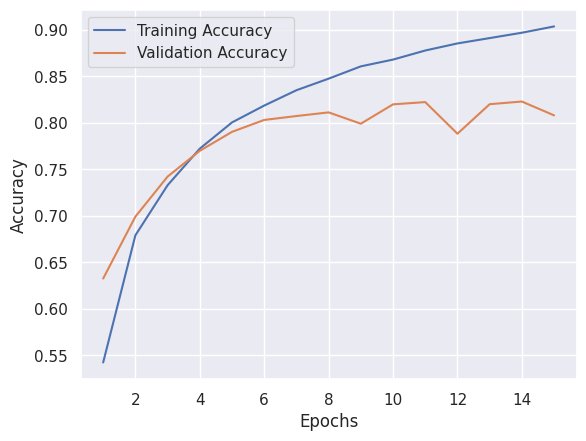

In [35]:
# plot training and validation accuracy
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Based on the loss and accuracy plots above, we can see that the model is overfitting after around the 4th epoch. This is concluded from the fact that the training loss keeps decreasing after that epoch, but the validation loss starts to hover around the same range and as a result, we see the training and validation loss diverge from each other.

Additionally, the training accuracy keeps increasing after the 4th epoch, but the validation accuracy seems to hover around the same range and as a result, we see a sharp difference between the two towards the end of the training process.

Based on these observations, we can conclude that the model is overfitting, meaning that it is starting to learn representations specific to the training data which do not generalize to unseen data.

## Question 4 (20 pts)

Develop a bidirectional LSTM model with one LSTM layer that includes 10 units. Call this `model2`. Set the embedding dimension to 70. Mask the zero paddings.  Use Adam optimizer and follow the accuracy metric during training. Train the model for 15 epochs and use batches of 1024 samples. [10 pts]

When training is complete, plot the training and validation loss and accuracy. Interpret your plots. Does the model seem to be overfitting? Explain why / why not. [10 pts]

In [36]:
# build the model
model2 = models.Sequential()
model2.add(layers.Embedding(10000, 70, input_length=50, mask_zero=True))
model2.add(layers.Bidirectional(layers.LSTM(10)))

# 3 class single-label classification problem
# use softmax for output layer activation
# use categorical cross-entropy loss function
model2.add(layers.Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 70)            700000    
                                                                 
 bidirectional (Bidirection  (None, 20)                6480      
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 706543 (2.70 MB)
Trainable params: 706543 (2.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# train the model
model2_history = model2.fit(x_train,
                            y_train,
                            epochs=15,
                            batch_size=1024,
                            validation_data=(x_val, y_val))

Epoch 1/15
98/98 [==============================] - 54s 442ms/step - loss: 0.9469 - accuracy: 0.5434 - val_loss: 0.7000 - val_accuracy: 0.6979
Epoch 2/15
98/98 [==============================] - 33s 336ms/step - loss: 0.5455 - accuracy: 0.7976 - val_loss: 0.4833 - val_accuracy: 0.8334
Epoch 3/15
98/98 [==============================] - 32s 327ms/step - loss: 0.4134 - accuracy: 0.8634 - val_loss: 0.4313 - val_accuracy: 0.8536
Epoch 4/15
98/98 [==============================] - 29s 294ms/step - loss: 0.3578 - accuracy: 0.8848 - val_loss: 0.4114 - val_accuracy: 0.8608
Epoch 5/15
98/98 [==============================] - 28s 289ms/step - loss: 0.3220 - accuracy: 0.8984 - val_loss: 0.4020 - val_accuracy: 0.8643
Epoch 6/15
98/98 [==============================] - 27s 276ms/step - loss: 0.2969 - accuracy: 0.9080 - val_loss: 0.3987 - val_accuracy: 0.8670
Epoch 7/15
98/98 [==============================] - 26s 269ms/step - loss: 0.2735 - accuracy: 0.9161 - val_loss: 0.3971 - val_accuracy: 0.8691

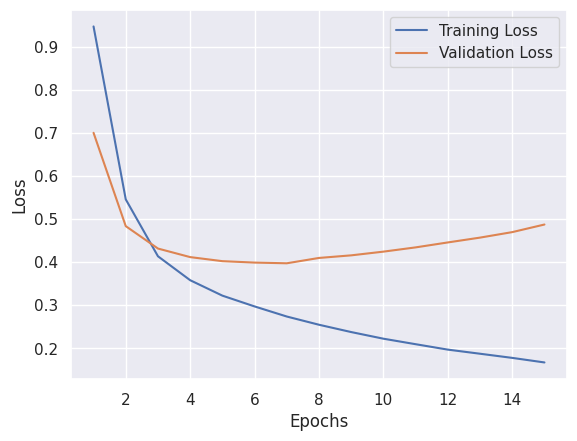

In [38]:
# plot training and validation loss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc2  = model2_history.history['accuracy']
train_loss2 = model2_history.history['loss']
val_acc2  = model2_history.history['val_accuracy']
val_loss2 = model2_history.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

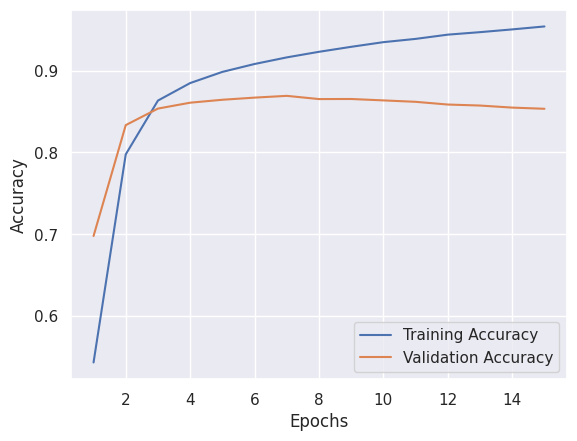

In [39]:
# plot training and validation accuracy
plt.plot(epochs, train_acc2, label = 'Training Accuracy')
plt.plot(epochs, val_acc2, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Based on the loss and accuracy plots above, we can see that the model is overfitting after around the 3rd epoch. This is concluded from the fact that the training loss keeps decreasing after that epoch, but the validation loss starts to increase and we see the training and validation loss diverge from each other.

Additionally, the training accuracy keeps increasing after the 3rd epoch, but the validation accuracy seems to hover around the same range and as a result, we see a sharp difference between the two towards the end of the training process.

Based on these observations, we can conclude that the model is overfitting, meaning that it is starting to learn representations specific to the training data which do not generalize to unseen data.

## Question 5 (5 pts)

Evalute both `model1` and `model2` on the test data. You can use batch size of 1024 to speed up the evaluation process. Which model performs better on the test data?

In [40]:
# evaluate model1
model1.evaluate(x_test, y_test)

2163/2163 [==============================] - 21s 10ms/step - loss: 0.5667 - accuracy: 0.8058


[0.5667247176170349, 0.8057514429092407]

In [41]:
# evaluate model2
model2.evaluate(x_test, y_test)

2163/2163 [==============================] - 68s 32ms/step - loss: 0.4962 - accuracy: 0.8532


[0.4962388277053833, 0.8531936407089233]

In [ ]:
# note: I did not use batch size of 1024 for evaluation as the process ran pretty fast for me

Based on the model evaluation results, we can see that model2, which is the model with the bidirectional LSTM layer, performs much better than model1, which is the model with the SimpleRNN layer, on the test data. This can be concluded from comparing the evaluation losses and accuracies for both the models. The model2 has a test accuracy of 85.32% and a test loss of 0.4962, while model1 has a test accuracy of 80.58% and a test loss of 0.5667. Hence, model 2 not only is more accurate on the test data, but also has a significantly lower test loss than model1. Hence, model2 performs better on the test data.

## Question 6 (10 pts)

Plot the validation loss of `model1` and `model2` on the same graph to compare the two models head-to-head. Then, explain which model you would select and how you would build your final model. (no need to actually build a final model; just explain in English how you would go about that.)

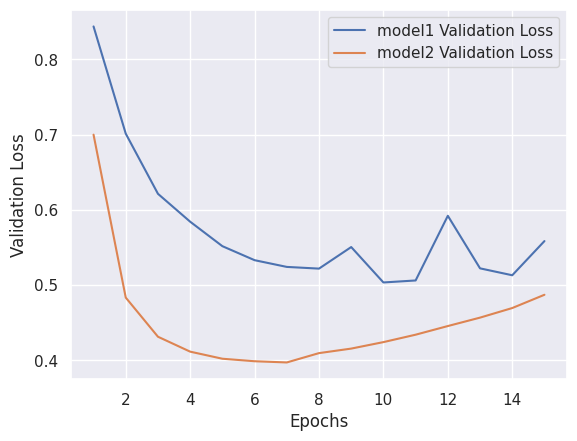

In [42]:
# plot validation losses of model1 and model2

plt.plot(epochs, val_loss1, label = 'model1 Validation Loss')
plt.plot(epochs, val_loss2, label = 'model2 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

Based on the plot above, we can see that the in terms of validation loss, model2 significantly outperforms model1. The validation loss for model2 stays lower than that of model1 throughout the respective training processes. Additionally, based on the test accuracies and losses compared earlier, model2 performed much better on the test set than model1. Hence, I would select model2, which is the model with the bidirectional LSTM layer.

For building the final model, I would make some changes to model2. I would try to tune the hyperparameters (learning rate, units in the bidirectional LSTM layer, embedding dimension, batch size, etc.) to try to get a model that still overfits, but with a higher validation accuracy.

Once I have a satisfactory validation accuracy, I would begin dealing with the overfitting problem by experimenting with recurrent dropout, combined with early stopping using callbacks to get the best model. However, this is only if the recurrent dropout gives better results. If it does not, then I would only use early stopping using callbacks to get the best model.